# Emotion Detection

**Importing Libraries**

In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2 
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG,Image
import tensorflow as tf
print("Tensorflow version:",tf.__version__)

Tensorflow version: 2.9.1


**Exploring Dataset**

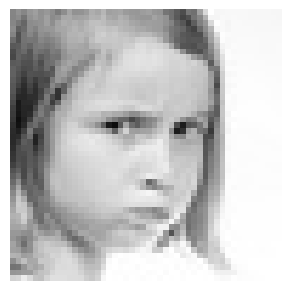

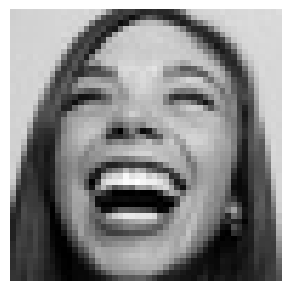

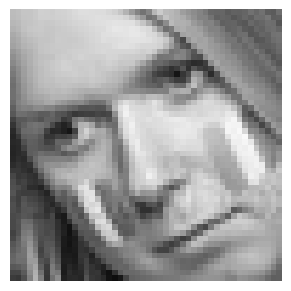

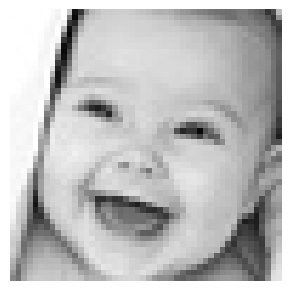

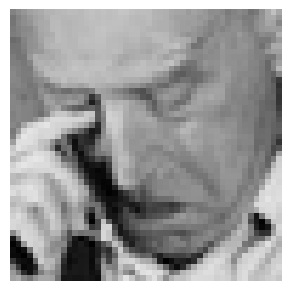

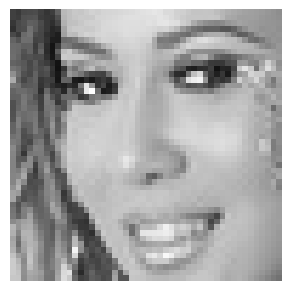

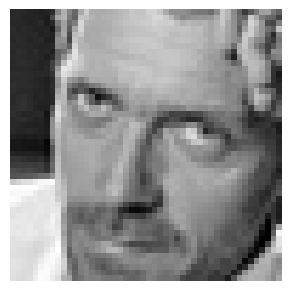

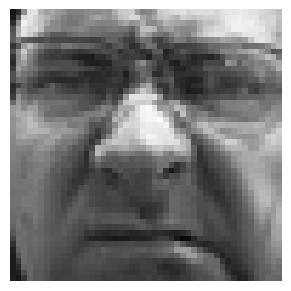

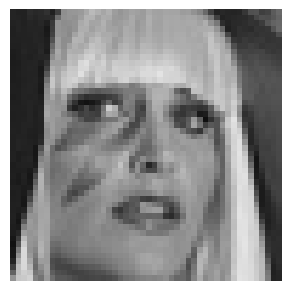

In [2]:
images = glob("train/**/**")
for i in range(9):
 image = random.choice(images)
 plt.figure(figsize=(12,12))
 plt.subplot(331+i)
 plt.imshow(cv2.imread(image));plt.axis('off')

**Preparing Data for Training**

In [10]:
img_size=48
batch_size=64
datagen_train= ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size = (img_size,img_size),
                                                    color_mode  = "grayscale",
                                                    batch_size  = batch_size,
                                                    class_mode  = "categorical",
                                                    shuffle     = True)

datagen_validation= ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                    target_size = (img_size,img_size),
                                                    color_mode  = "grayscale",
                                                    batch_size  = batch_size,
                                                    class_mode  = "categorical",
                                                    shuffle     = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [11]:
def Convolution(input_tensor,filters,kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size ,padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x


In [12]:
def Dense_f(input_tensor,nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [13]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(inputs,64,(5,5))
    conv_3 = Convolution(inputs,128,(3,3))
    
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)
    
    output  = Dense(7,activation = "softmax")(dense_1)
    model  = Model(inputs = [inputs], outputs = [output])
    
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam' , metrics = ['accuracy'])
    
    return model


In [14]:
model =  model_fer((48,48,1))
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 128)      512       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 128)       0   

**Intializing the Model**

In [17]:
epochs=15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor = 'val_accuracy' , save_weights_only = True , mode = 'max', vaerbose = 1)
callbacks = [checkpoint]

# Training the Model

**The next cell takes time to complete**

In [19]:
history = model.fit(
    x = train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks)

Epoch 1/15
448/448 [==============================] - 292s 651ms/step - loss: 1.6578 - accuracy: 0.3782 - val_loss: 1.6079 - val_accuracy: 0.3813
Epoch 2/15
448/448 [==============================] - 124s 277ms/step - loss: 1.3532 - accuracy: 0.4864 - val_loss: 1.7595 - val_accuracy: 0.3112
Epoch 3/15
448/448 [==============================] - 140s 313ms/step - loss: 1.1916 - accuracy: 0.5550 - val_loss: 1.6714 - val_accuracy: 0.3627
Epoch 4/15
448/448 [==============================] - 131s 291ms/step - loss: 1.0565 - accuracy: 0.6078 - val_loss: 1.6858 - val_accuracy: 0.4171
Epoch 5/15
448/448 [==============================] - 130s 290ms/step - loss: 0.9346 - accuracy: 0.6594 - val_loss: 1.6962 - val_accuracy: 0.4040
Epoch 6/15
448/448 [==============================] - 141s 316ms/step - loss: 0.8089 - accuracy: 0.7073 - val_loss: 1.6224 - val_accuracy: 0.4173
Epoch 7/15
448/448 [==============================] - 162s 361ms/step - loss: 0.6993 - accuracy: 0.7508 - val_loss: 1.5287 -

**Model Evaluation**

In [20]:
model.evaluate(validation_generator)

113/113 [==============================] - 7s 61ms/step - loss: 1.8824 - accuracy: 0.5104


[1.8824079036712646, 0.5104485750198364]

**Plotting Loss**

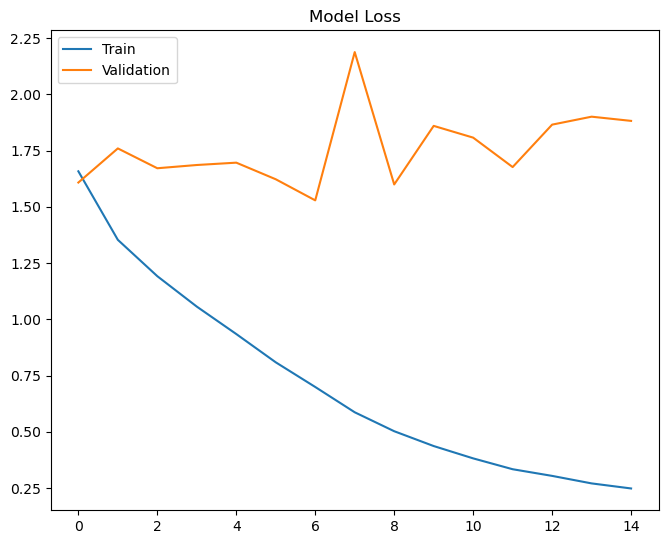

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

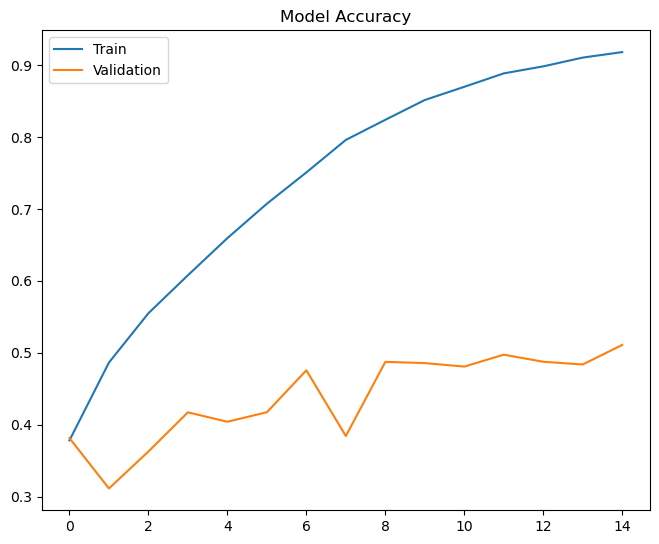

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

In [24]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)